<a href="https://colab.research.google.com/github/Rohit-Singh12/Deep-LEARGNINGS/blob/main/LLM%20Fine%20tuning/LoRA/LoRA_vs_Full_Model_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding to LoRA vs. Full Model Training

When fine-tuning models, we often choose between **Low-Rank Adaptation (LoRA)** and **Full Model Training** based on efficiency, resource constraints, and intended use.

- **LoRA** updates only a small set of parameters, significantly reducing computational costs while maintaining quality. It is ideal for domain adaptation or adding specific knowledge to large pre-trained models without excessive resource usage.
- **Full Model Training**, on the other hand, modifies all parameters, leading to better generalization but requiring significantly more compute power and data. This approach is necessary when making deep architectural changes or significantly altering a model’s behavior.


In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset,get_dataset_config_names

In [ ]:
configs = get_dataset_config_names("financial_phrasebank")

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
data = load_dataset("financial_phrasebank", "sentences_allagree")

FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [ ]:
checkpoint = 'distilbert-base-uncased'#base model

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize(sentence):
  return tokenizer(
      sentence['sentence'],
      padding="max_length",
      truncation=True,
      max_length=512,
      return_tensors="tf"
  )

In [ ]:
tokenized_data = data.map(tokenize, batched=True)

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [ ]:
training_data = tokenized_data['train'].train_test_split(test_size=0.2)

In [ ]:
training_data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1811
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 453
    })
})

In [ ]:
train_data = training_data['train']
test_data = training_data['test']

In [ ]:
len(train_data), len(test_data)

(1811, 453)

In [ ]:
test_data = test_data.train_test_split(test_size=0.5)
test_data, val_data = test_data['test'], test_data['train']

In [ ]:
val_

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_train = train_data.to_pandas()
df_test = test_data.to_pandas()
df_val = val_data.to_pandas()

In [ ]:
len(val_data)

15

In [ ]:
df_train

,sentence,label,input_ids,attention_mask
0,Lemmink+ñinen started the manufacture of roofi...,1,"[101, 3393, 7382, 19839, 1009, 3157, 2078, 231...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"With five different game modes , co-op tournam...",1,"[101, 2007, 2274, 2367, 2208, 11583, 1010, 252...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"At this growth rate , paying off the national ...",0,"[101, 2012, 2023, 3930, 3446, 1010, 7079, 2125...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,The platen edges in contact with the band are ...,1,"[101, 1996, 5127, 2078, 7926, 1999, 3967, 2007...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,- Cash flow from operating activities before i...,1,"[101, 1011, 5356, 4834, 2013, 4082, 3450, 2077...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
1806,The scheme for TeliaSonera and Altimo is pract...,1,"[101, 1996, 5679, 2005, 10093, 7951, 5643, 252...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1807,The event can also be viewed as a live webcast...,1,"[101, 1996, 2724, 2064, 2036, 2022, 7021, 2004...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1808,"Biohit Oyj develops , manufactures and markets...",1,"[101, 16012, 16584, 1051, 2100, 3501, 11791, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1809,The total amount of subscription prices was re...,1,"[101, 1996, 2561, 3815, 1997, 15002, 7597, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
df_train['type'] = 'train'
df_test['type'] = 'test'
df_val['type'] = 'val'

In [ ]:
df_merged = pd.concat([df_train, df_test, df_val])

In [ ]:
df_merged.columns

Index(['sentence', 'label', 'input_ids', 'attention_mask', 'type'], dtype='object')

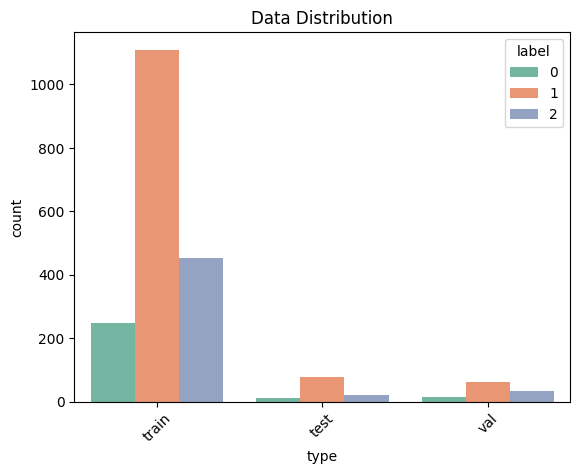

In [ ]:
sns.countplot(data=df_merged, x='type', hue='label', palette='Set2')
plt.title("Data Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
model_full = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
import tensorflow as tf
from transformers import DataCollatorWithPadding

In [ ]:
def to_tf_data(data):
  return data.to_tf_dataset(
      columns=["input_ids", "attention_mask"],
      label_cols=['label'],
      shuffle=True,
      batch_size=8,
      collate_fn=DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
  )

In [ ]:
train_data = to_tf_data(train_data)

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:405: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
val_data = to_tf_data(val_data)

In [ ]:
num_train_steps = len(train_data)*3
lr_schedules = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    decay_steps=num_train_steps,
    end_learning_rate=0.0
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedules)

In [ ]:
model_full.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model_full.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955779 (255.42 MB)
Trainable params: 66955779 (255.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_full.fit(train_data,
         epochs=10,
         validation_data=val_data)

Epoch 1/10
227/227 [==============================] - 126s 451ms/step - loss: 0.3502 - accuracy: 0.8658 - val_loss: 0.1582 - val_accuracy: 0.9381
Epoch 2/10
227/227 [==============================] - 104s 457ms/step - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.1078 - val_accuracy: 0.9646
Epoch 3/10
227/227 [==============================] - 104s 458ms/step - loss: 0.0356 - accuracy: 0.9879 - val_loss: 0.1016 - val_accuracy: 0.9646
Epoch 4/10
227/227 [==============================] - 106s 467ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.1016 - val_accuracy: 0.9646
Epoch 5/10
227/227 [==============================] - 105s 462ms/step - loss: 0.0266 - accuracy: 0.9934 - val_loss: 0.1016 - val_accuracy: 0.9646
Epoch 6/10
227/227 [==============================] - 106s 465ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.1016 - val_accuracy: 0.9646
Epoch 7/10
227/227 [==============================] - 105s 463ms/step - loss: 0.0262 - accuracy: 0.9923 - val_loss: 0.1016 -

In [ ]:
from transformers import AutoModelForSequenceClassification
#training using LoRA
model_lora = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
# model_lora.load_weights("/content/drive/My Drive/classifier_head_weights.h5", by_name=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from peft import LoraConfig,  get_peft_model

In [ ]:
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_lin", "v_lin"],
    lora_dropout=0.05,
    bias="none",
    task_type="SEQ_CLS"
)

In [ ]:
# Apply LoRA
model_lora = get_peft_model(model_lora, lora_config)

# Print trainable parameters
model_lora.print_trainable_parameters()


trainable params: 740,355 || all params: 67,696,134 || trainable%: 1.0936


In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2264
    })
})

In [ ]:
def tokenize_function(data):
  return tokenizer(
      data['sentence'],
      truncation=True,
      padding='max_length',
      max_length=512
  )
torch_tokenized_data = data.map(tokenize_function, batched=True)
torch_tokenized_data

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2264
    })
})

In [ ]:
import torch
tokenized_data.set_format('torch')

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./lora_finetuned",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none",
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
torch_tokenized_data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2264
    })
})

In [ ]:
torch_train = torch_tokenized_data['train'].train_test_split(test_size=0.2)
torch_train

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1811
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 453
    })
})

In [ ]:
torch_train, torch_test = torch_train['train'], torch_train['test']
torch_test = torch_test.train_test_split(test_size=0.5)
torch_test

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 226
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 227
    })
})

In [ ]:
torch_test, torch_eval = torch_test['test'], torch_test['train']

In [ ]:
len(val_data)

15

In [ ]:
from transformers import Trainer, DataCollatorWithPadding
trainer = Trainer(
    model=model_lora,
    args=training_args,
    train_dataset=torch_train,
    eval_dataset=torch_eval,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer)
)

<ipython-input-53-120f9dc0b86e>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.574100,0.490417
2,0.296100,0.312157
3,0.206000,0.240308
4,0.197300,0.210828
5,0.128800,0.196804
6,0.149500,0.182950
7,0.101200,0.179601
8,0.112500,0.179822
9,0.088000,0.175560
10,0.130100,0.176657


TrainOutput(global_step=1140, training_loss=0.2376896009110568, metrics={'train_runtime': 692.8559, 'train_samples_per_second': 26.138, 'train_steps_per_second': 1.645, 'total_flos': 2440216222986240.0, 'train_loss': 0.2376896009110568, 'epoch': 10.0})

In [ ]:
len(torch_test), len(test_data)

(227, 114)

In [ ]:
model_lora.eval()

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): DistilBertForSequenceClassification(
      (distilbert): DistilBertModel(
        (embeddings): Embeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (transformer): Transformer(
          (layer): ModuleList(
            (0-5): 6 x TransformerBlock(
              (attention): DistilBertSdpaAttention(
                (dropout): Dropout(p=0.1, inplace=False)
                (q_lin): lora.Linear(
                  (base_layer): Linear(in_features=768, out_features=768, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=7

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_data, torch_test

(Dataset({
     features: ['sentence', 'label', 'input_ids', 'attention_mask'],
     num_rows: 114
 }),
 Dataset({
     features: ['sentence', 'label', 'input_ids', 'attention_mask'],
     num_rows: 227
 }))

In [ ]:
import numpy as np
# Convert Hugging Face Dataset to dictionary format
test_data_dict = test_data.to_dict()
torch_test_dict = torch_test.to_dict()

# Extract input IDs and attention masks
test_texts = test_data_dict["sentence"]
torch_test_texts = torch_test_dict["sentence"]

# Extract true labels
true_labels_tf = np.array(test_data_dict["label"])
true_labels_pt = np.array(torch_test_dict["label"])
# Tokenize the inputs
tf_inputs = tokenizer(test_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")
pt_inputs = tokenizer(torch_test_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")


In [ ]:
tf_inputs_tensors = {key: tf.convert_to_tensor(val.numpy()) for key, val in tf_inputs.items()}
tf_preds = model_full(tf_inputs_tensors).logits

In [ ]:
tf_preds = np.argmax(tf_preds, axis=-1)

In [ ]:
tf_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2])

In [ ]:
pt_inputs = {key: val.to('cuda') for key, val in pt_inputs.items()}
with torch.no_grad():
  lora_preds = model_lora(**pt_inputs).logits
  lora_preds = torch.argmax(lora_preds, dim=-1).cpu().numpy()

In [ ]:
lora_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 1, 2, 2])

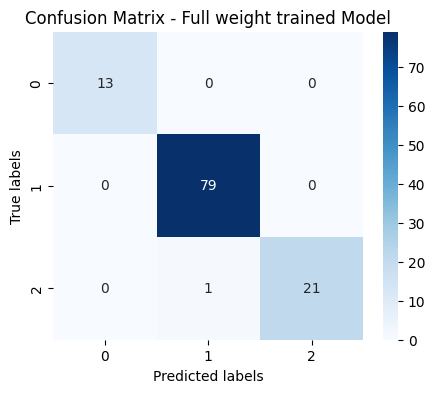

In [ ]:
cf_matrix_full = confusion_matrix(true_labels_tf, tf_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cf_matrix_full, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("Confusion Matrix - Full weight trained Model")
plt.show()

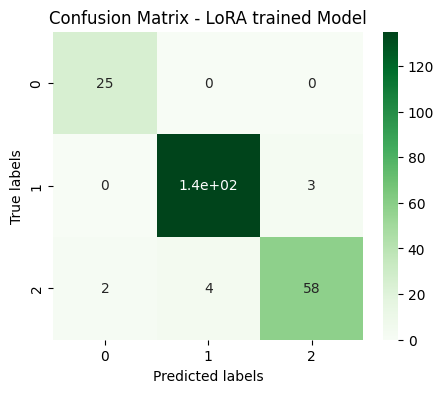

In [ ]:
cf_matrix_lora = confusion_matrix(true_labels_pt, lora_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cf_matrix_lora, annot=True, cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("Confusion Matrix - LoRA trained Model")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
full_model_accuracy = accuracy_score(true_labels_tf, tf_preds)
lora_accuracy = accuracy_score(true_labels_pt, lora_preds)
print(full_model_accuracy, lora_accuracy)

0.9912280701754386 0.960352422907489
